In [ ]:
#Importing Libraries

import numpy as np
import cvxpy as cvx
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_datareader.data as pdr

## Optimization with cvxpy

http://www.cvxpy.org/

Practice using cvxpy to solve a simple optimization problem. Find the optimal weights on a m-asset portfolio given the covariance matrix of the returns of m-stocks . Create a function that takes in these values as arguments and returns the vector of optimal weights.


## Hints

### x vector
To create a vector of M variables $\mathbf{x} = \begin{bmatrix}
x_1 &...& x_M
\end{bmatrix}
$
we can use `cvx.Variable(m)`

### covariance matrix
If we have $m$ stock series, the covariance matrix is an $m \times m$ matrix containing the covariance between each pair of stocks.  We can use [numpy.cov](https://docs.scipy.org/doc/numpy/reference/generated/numpy.cov.html) to get the covariance.  We give it a 2D array in which each row is a stock series, and each column is an observation at the same period of time.

The covariance matrix $\mathbf{P} = 
\begin{bmatrix}
\sigma^2_{1,1} & ... & \sigma^2_{1,m} \\ 
... & ... & ...\\
\sigma_{m,1} & ... & \sigma^2_{m,m}  \\
\end{bmatrix}$

### portfolio variance
We can write the portfolio variance $\sigma^2_p = \mathbf{x^T} \mathbf{P} \mathbf{x}$

Recall that the $\mathbf{x^T} \mathbf{P} \mathbf{x}$ is called the quadratic form.
We can use the cvxpy function `quad_form(x,P)` to get the quadratic form.

### optimization
So now that we have our objective function and constraints, we can solve for the values of $\mathbf{x}$.
cvxpy has the constructor `Problem(objective, constraints)`, which returns a `Problem` object.

The `Problem` object has a function solve(), which returns the minimum of the solution.  In this case, this is the minimum variance of the portfolio.

It also updates the vector $\mathbf{x}$.

We can check out the values of vector of weights x that gave the minimum portfolio variance by using `x.value`

In [ ]:
def optimize_portfolio(returns):
    """
    Create a function that takes the return series of a set of stocks,The function 
    will minimize a combination of the portfolio variance.  
    The optimization will be constrained to be long only, and the weights should sum to one.
    
    Parameters
    ----------
    returns : numpy.ndarray
        2D array containing stock return series in each row.
        
    index_weights : numpy.ndarray
        1D numpy array containing weights of the index.
        

        
    Returns
    -------
    x : np.ndarray
        A numpy ndarray containing the weights of the stocks in the optimized portfolio
    """
    # TODO: Use cvxpy to determine the weights on the assets
    # that minimizes the  portfolio variance 
    
    # number of stocks m is number of rows of returns, and also number of index weights
    
    m = len(returns)
    #covariance matrix of returns
    cov = np.asmatrix(np.cov(returns))
    
    # x variables (to be found with optimization)
    x = cvx.Variable(m)
    
    #portfolio variance, in quadratic form
    portfolio_variance = cvx.quad_form(x,cov)   
    
    #objective function
    objective = cvx.Minimize(portfolio_variance)
    
    #constraints
    constraints = [x >= 0, sum(x) == 1]

    #use cvxpy to solve the objective
    prob = cvx.Problem(objective, constraints)
    prob.solve()
    x_values = x.value

    return x_values

In [ ]:
#Stock_Data_Extraction
tickers = ["ASIANPAINT.NS","ADANIPORTS.NS","AXISBANK.NS","BAJAJ-AUTO.NS",
           "BAJFINANCE.NS","BAJAJFINSV.NS","BPCL.NS","BHARTIARTL.NS",
           "INFRATEL.NS","CIPLA.NS","COALINDIA.NS","DRREDDY.NS","EICHERMOT.NS",
           "GAIL.NS","GRASIM.NS","HCLTECH.NS","HDFCBANK.NS","HEROMOTOCO.NS",
           "HINDALCO.NS","HINDPETRO.NS","HINDUNILVR.NS","HDFC.NS","ITC.NS",
           "ICICIBANK.NS","IBULHSGFIN.NS","IOC.NS","INDUSINDBK.NS","INFY.NS",
           "KOTAKBANK.NS","LT.NS","LUPIN.NS","M&M.NS","MARUTI.NS","NTPC.NS",
           "ONGC.NS","POWERGRID.NS","RELIANCE.NS","SBIN.NS","SUNPHARMA.NS",
           "TCS.NS","TATAMOTORS.NS","TATASTEEL.NS","TECHM.NS","TITAN.NS",
           "UPL.NS","ULTRACEMCO.NS","VEDL.NS","WIPRO.NS","YESBANK.NS","ZEEL.NS"]

start= datetime(2018,1,1)
end = datetime.today()

#Creeating a dictionary to store data for all stocks.
ohlc_daily = {}
for i in range(len(tickers)):
    ohlc_daily[tickers[i]] = pdr.get_data_yahoo(tickers[i],start = start , end = end)

#Creating a dataframe to store daily_returns of all stocks
returns = pd.DataFrame()
for ticker in tickers:
    returns[ticker] = (ohlc_daily[ticker]['Adj Close'].pct_change())
returns = returns.dropna(axis=0)

#Applying Optimization function to get min_variance_weights
min_var_weights = optimize_portfolio(returns.T)
print(min_var_weights)

[ 1.02238463e-01  8.24466807e-20  5.75851168e-20 -1.81311098e-19
  1.47639361e-19 -2.43750424e-20  2.89870550e-19  6.11515748e-03
  1.54169262e-02  5.31387393e-02  4.21301024e-02  8.38954058e-02
 -6.75771904e-20  1.14683666e-19 -1.19294858e-21  4.26422306e-03
  5.66547681e-02 -1.72068520e-19  2.54767785e-19  1.64827439e-19
  7.84463961e-02  3.88090698e-20  5.28632550e-02  8.82947521e-21
 -1.95820418e-19  1.41516445e-03 -1.46022152e-21  1.30761604e-02
 -2.28966203e-19 -1.51951953e-21  8.17514945e-02 -1.46402446e-19
 -1.38217968e-20  5.43137684e-02  3.09591910e-19  1.51902806e-01
 -1.67143142e-19  1.72826446e-19  1.98460802e-19  1.05953927e-01
  1.83380230e-19  1.69840782e-19  1.79001870e-19  2.22546769e-03
  1.48019307e-19 -6.83409689e-21  2.03501280e-19  7.14631630e-02
  2.27346122e-02  5.62229811e-20]


In [ ]:
portfolio = pd.DataFrame()
portfolio['ret'] = np.sum(min_var_weights*returns,axis=1)

In [ ]:
def performance_analysis(df,window,rf,leverage):    
    
    df['cum_return'] = (1+df['ret']*leverage).cumprod()
    Cumm_Ret = (df['cum_return'].iloc[-1]-1)
    n = len(df)/(252)   
    CAGR = ((df["cum_return"].iloc[-1])**(1/n) - 1)
    
    df['rolling_volatility'] = df['ret'].rolling(window).std()
    volatility =  df['ret'].std()*np.sqrt(252)
    
    df['rolling_sharpe'] = df['ret'].rolling(window).mean()/df['ret'].rolling(window).std()*np.sqrt(window)
    sr = (CAGR - rf)/volatility
    
  
    
    df["cum_roll_max"] = df["cum_return"].cummax()
    df["drawdown"] = df["cum_roll_max"] - df["cum_return"]
    df["drawdown_pct"] = df["drawdown"]/df["cum_roll_max"]
    max_dd = df["drawdown_pct"].max()
    
    df["Year"] = df.index.map(lambda x: x.year)
    df["Month"] = df.index.map(lambda x: x.strftime("%b"))
    pt = df.pivot_table(index="Month",columns="Year",values="ret", aggfunc="sum").fillna(0)
    months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
    pt = pt.reindex(months)    
    sns.heatmap(pt, annot=True, cmap="RdYlGn")
    
    performance_df = pd.DataFrame([Cumm_Ret*100,CAGR*100,volatility,sr,max_dd*100],index=["Cumm_Return","Annual_Return","Volatility","Sharpe Ratio","Max Drawdown"])      
    print(performance_df)

    return df


                       0
Cumm_Return    23.740760
Annual_Return   8.821256
Volatility      0.159637
Sharpe Ratio    0.552583
Max Drawdown   22.418449


,ret,cum_return,rolling_volatility,rolling_sharpe,cum_roll_max,drawdown,drawdown_pct,Year,Month
Date,,,,,,,,,
2018-01-02,0.000655,1.000655,NaN,NaN,1.000655,0.000000,0.000000,2018,Jan
2018-01-03,-0.003078,0.997575,NaN,NaN,1.000655,0.003080,0.003078,2018,Jan
2018-01-04,0.007742,1.005299,NaN,NaN,1.005299,0.000000,0.000000,2018,Jan
2018-01-05,0.008707,1.014052,NaN,NaN,1.014052,0.000000,0.000000,2018,Jan
2018-01-08,0.005482,1.019611,NaN,NaN,1.019611,0.000000,0.000000,2018,Jan
...,...,...,...,...,...,...,...,...,...
2020-07-30,0.001307,1.233196,0.007016,0.822758,1.233196,0.000000,0.000000,2020,Jul
2020-07-31,0.005305,1.239738,0.006947,0.771631,1.239738,0.000000,0.000000,2020,Jul
2020-08-03,-0.005214,1.233275,0.007083,0.512471,1.239738,0.006464,0.005214,2020,Aug


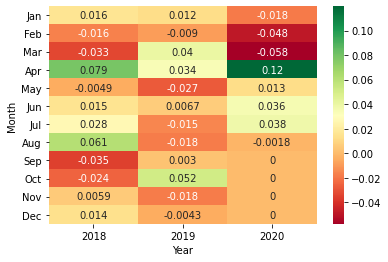

In [ ]:
window = 20
rf = 0
leverage=1
performance_analysis(portfolio,window,rf,leverage = 1)